# Math 404 - Analyzing Nonlinear Systems
$\mathbb{E}\text{van}~\mathbb{C}\text{arpenter}$ 



TODO
1. Figure out parsing with or without sympy
1. Debug fixed points (dictionary)
1. Plot test trajectories
1. Normalize eigenvectors
1. tooltips?
1. maybe with nullclines
1. animation
1. Poincare Map, integrator? reset for theta so it isn't very large? 
1. For RK4, handling a nonlinear system, do you just put it into one equation? or do vectors

In [1]:
import sympy
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib qt
#%matplotlib notebook
sympy.init_printing(use_latex="mathjax")
x_s, y_s = sympy.symbols(" x y ")
mu, r, a, b  = sympy.symbols(" \mu r a b ")

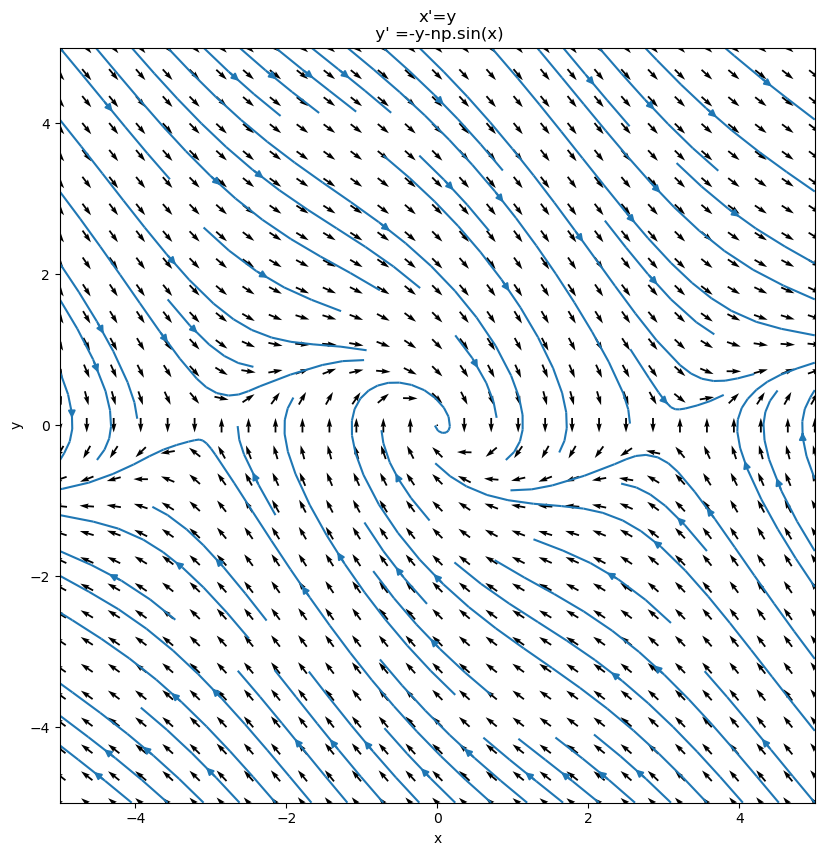

In [22]:
a=1
b=0
mu=0*-5.065
fun=[f"y", #xdot
     f"-y-np.sin(x)"] #ydot

fixed_points = []
params = []

plot_vector_field(fun,  
                  fixed_points_list=fixed_points, 
                  parameters=params, 
                  flow=True,
                  population=False)

[[7.07106781 6.75730398 6.46030473 6.18248659 5.92654764 5.69543822
  5.49229362 5.32031814 5.18261557 5.08197268 5.02061864 5.
  5.02061864 5.08197268 5.18261557 5.32031814 5.49229362 5.69543822
  5.92654764 6.18248659 6.46030473 6.75730398 7.07106781]
 [6.75730398 6.42824347 6.11528366 5.82102203 5.54843437 5.30086536
  5.08197268 4.89560437 4.74559387 4.63547229 4.56812528 4.54545455
  4.56812528 4.63547229 4.74559387 4.89560437 5.08197268 5.30086536
  5.54843437 5.82102203 6.11528366 6.42824347 6.75730398]
 [6.46030473 6.11528366 5.78541912 5.47345208 5.18261557 4.91666083
  4.67983188 4.47675355 4.31219681 4.19070203 4.11608415 4.09090909
  4.11608415 4.19070203 4.31219681 4.47675355 4.67983188 4.91666083
  5.18261557 5.47345208 5.78541912 6.11528366 6.46030473]
 [6.18248659 5.82102203 5.47345208 5.14259477 4.83188446 4.54545455
  4.28817324 4.06557814 3.88363807 3.74827784 3.66466261 3.63636364
  3.66466261 3.74827784 3.88363807 4.06557814 4.28817324 4.54545455
  4.83188446 5.142

NameError: name 'z' is not defined

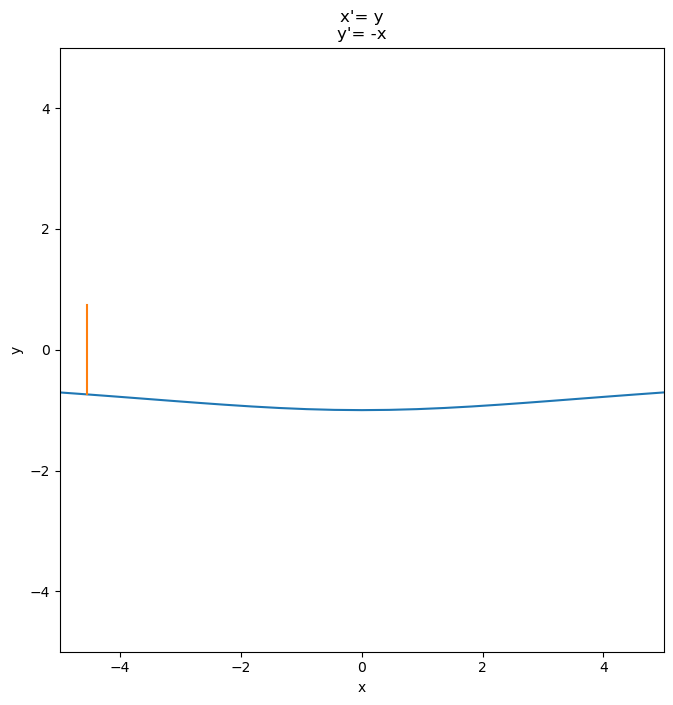

In [11]:
class nonlinear_function():
    def __init__(self, xdot, ydot=0, zdot=0):
        self.xdot = xdot
        self.ydot = ydot
        self.zdot = zdot
        self.dim = (xdot != None) + (ydot != None) + (zdot != None)
    def fixed_points(self):
        from scipy.optimize import fsolve
        

def vizualize(func, positiveaxes=False):
    import numpy as np
    import matplotlib.pyplot as plt
    dimension = func.dim
    
    graph_range = [-5,5] if not positiveaxes else [0,10]
    graph_size = 8
    N = 3*graph_size-1
    
    f = [func.xdot, func.ydot] 
    f_xz = [func.xdot, func.zdot]
    f_yz = [func.ydot, func.zdot]
    
    x_points = np.linspace(start = graph_range[0], stop = graph_range[1], num = N) 
    y_points = np.linspace(start = graph_range[0], stop = graph_range[1], num = N) 
    z_points = np.linspace(start = graph_range[0], stop = graph_range[1], num = N) 
    
    x, y = np.meshgrid(x_points, y_points) # creates a grid/ kronecker product from x, y arrays
    
    x_dot, y_dot = np.array(list(map(eval, f))) 
    x_dot, z_dot = np.array(list(map(eval, f_xz))) 
    y_dot, z_dot = np.array(list(map(eval, f_yz))) 
    
    Normalizing_Factor = np.hypot(x_dot, y_dot) # Finding length of vector
    Normalizing_Factor = np.hypot(x_dot, y_dot) # Finding length of vector
    Normalizing_Factor = np.hypot(x_dot, y_dot) # Finding length of vector
    print(Normalizing_Factor)
    Normalizing_Factor[Normalizing_Factor==0] = 1. # Corrects div/0 errors by replacing it with 1.
    
    x_dot = x_dot/Normalizing_Factor # normalize vector to length 1, then double
    y_dot = y_dot/Normalizing_Factor
    z_dot = z_dot/Normalizing_Factor
    
    fig = plt.figure(figsize = (graph_size, graph_size), dpi = 100)
    ax = fig.add_subplot(111,
                         aspect = "equal", # makes it square
                         autoscale_on = False,
                         xlim=(graph_range[0], graph_range[1]),
                         ylim=(graph_range[0], graph_range[1]))
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("x'= {}\ny'= {}".format(f[0],f[1]))
    plt.plot(x[0], x_dot[0])
    plt.plot(y[1], y_dot[1])
    plt.plot(z[2], z_dot[2])
    #ax.quiver(x, y, x_dot, y_dot, pivot="mid")
    plt.show()
    plt.xlabel("x")
    plt.ylabel("z")
    plt.title("x'= {}\nz'= {}".format(f[0],f[3]))
    ax.quiver(x, z, x_dot, z_dot, pivot="mid")
    return plt.show()
        
func = nonlinear_function(xdot = "y",
                          ydot = "-x", 
                          zdot = "x*y-4*x")

vizualize(func)

In [12]:
def plot_vector_field(f, fixed_points_list=[], parameters=[], flow=False, population=False):
    
    f_n = f # f_normal
    
    if len(parameters)>=1:
        f_m = ["",""] # minus 1 from parameter
        f_n = ["",""] # normal funtion
        f_p = ["",""] # add 1 to parameter
        
        for i in [0,1]:
            f_m[i] = f[i].replace(params[0], str(params[1]-1)) 
            f_n[i] = f[i].replace(params[0], str(params[1]  )) 
            f_p[i] =f[i].replace(params[0], str(params[1]+1)) 
        #print(f_m,f_n,f_p)
    graph_range = [-5,5]
    if population==True:
        graph_range = [0,10]
    graph_size = 10 
    N = 3*graph_size-1 # Odd number of points on grid
    x_points = np.linspace(start = graph_range[0], # make array of N points that spans x range 
                           stop = graph_range[1],  # I want this to be square, so x_points = y_points
                           num = N) 
    x,y = np.meshgrid(x_points,x_points) # creates a grid/ kronecker product from x, y arrays
    
    def get_changed_param_plot(f):
        def dxdt_and_dydt(x,y): # evaluate the string f, which has x and y, so iterate through each point it has,
            return map(eval, f) # this gives the rate of change--> direction of vectors
    
        x_dot, y_dot = dxdt_and_dydt(x,y) 
    
        Normalizing_Factor = np.hypot(x_dot, y_dot) # Finding length of vector
        Normalizing_Factor[Normalizing_Factor==0] = 1. # Corrects div/0 errors by replacing it with 1
    
        x_dot = x_dot/Normalizing_Factor # normalize vector to length 1, then double
        y_dot = y_dot/Normalizing_Factor
        return x_dot, y_dot
    
    
    x_n_dot, y_n_dot = get_changed_param_plot(f_n) # Get the normal plot now
    
    
    if len(parameters)>=1:
        x_m_dot, y_m_dot = get_changed_param_plot(f_m) # only get extra plots if there are extra params
        x_p_dot, y_p_dot = get_changed_param_plot(f_p)
        fig = plt.figure(figsize=(graph_size, graph_size), dpi=80)
        ax1 = fig.add_subplot(131,
                             aspect='equal', # makes it square
                             autoscale_on=False,
                             xlim=(graph_range[0], graph_range[1]),
                             ylim=(graph_range[0], graph_range[1]),
                             title='{}={}'.format(params[0],str(params[1]-1))
                            )
        ax2 = fig.add_subplot(132,
                             aspect='equal', # makes it square
                             autoscale_on=False,
                             xlim=(graph_range[0], graph_range[1]),
                             ylim=(graph_range[0], graph_range[1]),
                             title='{}={}'.format(params[0], str(params[1]))
                            )
        ax3 = fig.add_subplot(133,
                             aspect='equal', # makes it square
                             autoscale_on=False,
                             xlim=(graph_range[0], graph_range[1]),
                             ylim=(graph_range[0], graph_range[1]),
                             title='{}={}'.format(params[0],str(params[1]+1))
                            )
        ax1.quiver(x, y, x_m_dot, y_m_dot, pivot="mid")
        ax2.quiver(x, y, x_n_dot, y_n_dot, pivot="mid")
        ax3.quiver(x, y, x_p_dot, y_p_dot, pivot="mid")
        if flow:
            ax1.streamplot(x, y, x_m_dot, y_m_dot, density=0.75)
            ax2.streamplot(x, y, x_n_dot, y_n_dot, density=0.75)
            ax3.streamplot(x, y, x_p_dot, y_p_dot, density=0.75)
        plt.tight_layout()
    else:
        fig = plt.figure(figsize=(graph_size, graph_size), dpi=100)
        ax = fig.add_subplot(111,
                             aspect='equal', # makes it square
                             autoscale_on=False,
                             xlim=(graph_range[0], graph_range[1]),
                             ylim=(graph_range[0], graph_range[1])
                            )
        plt.xlabel("x")
        plt.ylabel("y")
        plt.title("x'={}\n y' ={}".format(f[0],f[1]))
        ax.quiver(x, y, x_n_dot, y_n_dot, pivot="mid")
        if flow:
            ax.streamplot(x, y, x_n_dot, y_n_dot, density=0.75)
    
    if len(fixed_points_list)>=1:
        x_val = [x[0] for x in fixed_points]
        y_val = [x[1] for x in fixed_points]
        plt.scatter(x_val, y_val)
    return plt.show()

In [13]:
def make_sympy_equations(f, # function string
                         functions=False, # Any special functions present? (sin, cos, exp,...)
                         parameters=[]): # Other parameters like mu, a, b, r,...
    func = f.copy()
    for i in [0,1]:
        func[i] = func[i].replace("x","x_s") 
        func[i] = func[i].replace("y","y_s")
        func[i] = func[i].replace("np.exp**","exp")
    if functions == True:
        for i in [0,1]:
            
            func[i] = func[i].replace("np.sin","sin")
    if len(parameters) >=1 :
        for parameter in parameters: # for including thnings like b, mu, r
            for i in [0,1]:
                func[i] = func[i].replace(f"{parameter}","\{}".format(parameter))
    x_dot = sympy.parse_expr(func[0],
                          local_dict={"x_s": x_s, "y_s": y_s}) # Parse string, substitute "x_s" string for x_s
    y_dot = sympy.parse_expr(func[1],
                          local_dict={"x_s": x_s, "y_s": y_s})
    return func, x_dot, y_dot

def linearize(xdot, ydot, fixed_point): # Create the Jacobian Matrix for a given system
    a=sympy.diff(xdot,x_s).subs(x_s, fixed_point[0]).subs(y_s, fixed_point[1])
    b=sympy.diff(xdot,y_s).subs(x_s, fixed_point[0]).subs(y_s, fixed_point[1])
    c=sympy.diff(ydot,x_s).subs(x_s, fixed_point[0]).subs(y_s, fixed_point[1])
    d=sympy.diff(ydot,y_s).subs(x_s, fixed_point[0]).subs(y_s, fixed_point[1])
    A=sympy.Matrix([[a,b],[c,d]])
    return A

def find_delta_tau(A): # Returns delta, tau, the determinant and solution of the linear(ized) system 
    e, t = sympy.symbols(' e t ')
    A_vecs = A.eigenvects()
    
    L_1, m_1, vm1 = A_vecs[0] # Eigenvalue, Multiplicity, Eigenvector
    L_2, m_2, vm2 = A_vecs[1]
    
    v_1 = sympy.UnevaluatedExpr( # Don't Evaluate
          sympy.N( # N(float, precision)
              vm1[0], # Eigenvector
              2))
    v_2 = sympy.UnevaluatedExpr(sympy.N(vm2[0], 2))
    
    Delta = L_1*L_2
    Tau = L_1+L_2
    det = Tau**2-4*Delta
    
    
    exp_1 = sympy.Pow(e,sympy.N(L_1,4)*t) # N(float, precision)
    exp_2 = sympy.Pow(e,sympy.N(L_2,4)*t)
    
    y1 = sympy.UnevaluatedExpr(sympy.Mul(v_1,exp_1))
    y2 = sympy.UnevaluatedExpr(sympy.Mul(v_2,exp_2))
    return Delta, Tau, det, y1, y2
    
def find_matrix_stability(Delta, Tau, det):
    str = ""
    if Tau<0:
        str+="Stable "
    elif Tau>0:
        str+="Unstable "
    if Delta<0:
        result = "Saddle Point" 
    elif Tau==0:
        result =  "Center"
    elif Delta==0:
        result =  "Non-Isolated Fixed Points"
    elif Delta>0:
        if det==0:
            result =  str+"Star / Degenerate Nodes"
        elif det>0:
            result =  str+"Node"
        elif det<0:
            result =  str+"Spiral"
    return result

def characterize_fixed_points(fixed_points_list): # where is x_dot,y_dot coming from
    for point in fixed_points_list:
        A = linearize(x_dot,y_dot, point)
        Delta, Tau, det, y1, y2 = find_delta_tau(A)
        Result = find_matrix_stability(Delta, Tau, det)

        sympy.pprint("{}: {}\n\n".format(point, Result))#, use_unicode=True)
        sympy.pprint(A)
        print("\n")
        sympy.pprint(y1+y2, use_unicode=True)
        print("\n----------------------------\n")

In [ ]:
func, x_dot, y_dot = make_sympy_equations(fun,True)
fixed_points = sympy.solve(func,x_s,y_s)
print(characterize_fixed_points(fixed_points))

In [ ]:
for i in np.linspace(2,2.3,40):
    mu=i
    A=sympy.Matrix([[mu/3+2, 1], 
                    [3+4*mu/3,mu]])
    Delta, Tau, det, y1, y2 = find_delta_tau(A)
    print(find_matrix_stability(Delta, Tau, det), i)

In [14]:
import numpy as np
import matplotlib.pyplot as plt

N=10000
rlist=np.linspace(0,4,400)
Rlist=[]
Plist=[]
fig= plt.subplots(figsize=(20,5))
plotlist=[]
for r in rlist:
    L=[]
    x=0.9
    for i in range(N):
        x = r*x-x**2
        if i>0.9*N:
            L.append(x)
    R = [r]*len(L)
    Rlist.append(R)
    Plist.append(L)
plt.scatter(Rlist, Plist, marker = ".", s=1, alpha=0.5)
plt.show()

In [8]:
from scipy.integrate import solve_ivp
from matplotlib.animation import FuncAnimation
from matplotlib import pyplot as plt
import numpy as np
%matplotlib qt

In [40]:
d_0 = [0.001, 0, 0]
r0 = [10, 5, 4] 
r1 = [r0[i] + d_0[i] for i in range(3)] 
r2 = [r0[i] + 0.1*d_0[i] for i in range(3)] 

t_ev = np.linspace(0,40,4000)
t_sp = [0, len(t_ev)]

def lorenz(t, r):
    x, y, z = r
    fx = 10 * (y - x)
    fy = 28 * x - y - x * z
    fz =  x * y - (8.0 / 3.0) * z
    return np.array([fx, fy, fz], float)

sol_0 = solve_ivp(lorenz, t_span = t_sp, y0 = r0, t_eval = t_ev)
sol_1 = solve_ivp(lorenz, t_span = t_sp, y0 = r1, t_eval = t_ev)
sol_2 = solve_ivp(lorenz, t_span = t_sp, y0 = r2, t_eval = t_ev)

t = sol_0.t
print(len(t))
y0_x, y0_y, y0_z = sol_0.y
y1_x, y1_y, y1_z = sol_1.y

4000


In [50]:
fig, ax = plt.subplots(figsize=(20,5))
plt.plot(sol_0.t, y0_y)
plt.plot(sol_0.t, y0_x)
plt.plot(sol_0.t, y0_z)
plt.show()

NameError: name 'FuncAnimation' is not defined

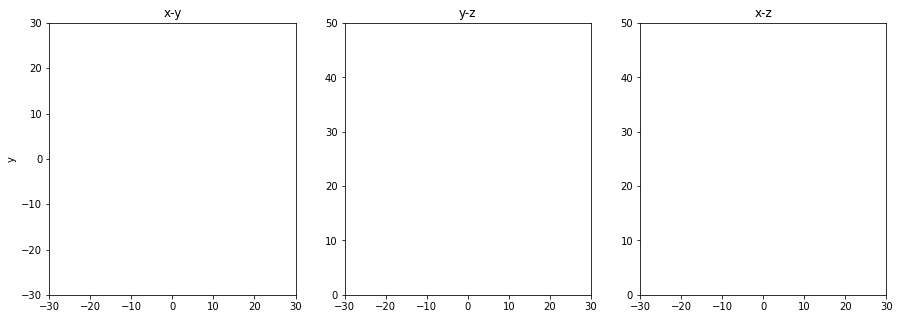

In [25]:
fig, ax_p = plt.subplots(1,3, figsize=(15,5))

ax_p[0].set_title("x-y")
ax_p[0].set_ylabel("y")
ax_p[0].set_xlim(-30,30)
ax_p[0].set_ylim(-30,30)

ax_p[1].set_title("y-z")
ax_p[1].set_xlim(-30,30)
ax_p[1].set_ylim(  0,50)

ax_p[2].set_title("x-z")
ax_p[2].set_xlim(-30,30)
ax_p[2].set_ylim(  0,50)

tdata = []
xdata = []
ydata = []
zdata = []

lines = []
lines0 = []
lines1 = []
lines2 = []

def animate_projections(i):
    global y0data
    tdata.append(t[i])
    
    xdata.append(y0_x[i])
    ydata.append(y0_y[i])
    zdata.append(y0_z[i])
    
    global ax_p, lines, lines1, lines2
    
    for line in lines:
        line.remove()
    for line in lines1:
        line.remove()
    for line in lines2:
        line.remove()
    
    lines1 = ax_p[0].plot(xdata, ydata)
    lines = ax_p[1].plot(ydata, zdata)
    lines2 = ax_p[2].plot(xdata, zdata)
    return ax_p

animate_projections = FuncAnimation(fig, 
                                    animate_projections, 
                                    frames = len(t_ev), 
                                    interval = 10, 
                                    repeat = False, 
                                    blit = True)

plt.tight_layout()
plt.show()

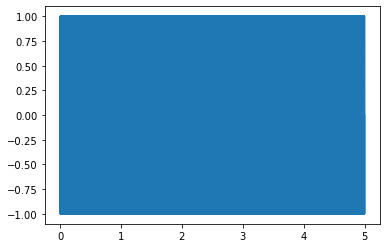

In [24]:
import numpy as np
from scipy.io import wavfile

sampleRate = 44100
frequency = 440
length = 5

t = np.linspace(0, length, sampleRate * length)  #  Produces a 5 second Audio-File
y = np.sin(frequency * 2 * np.pi * t)  #  Has frequency of 440Hz
plt.plot(t,y)
wavfile.write('Sine.wav', sampleRate, y)

NameError: name 'r0' is not defined

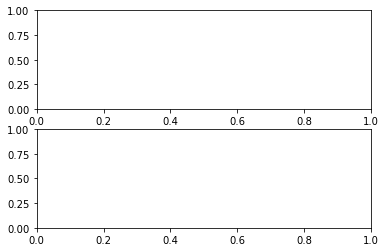

In [23]:
fig, ax = plt.subplots(2,1)
ax[0].set_title("Initial condition 1: {}\n Initial condition 2: {}".format(r0,r1))
ax[1].set_ylim([-1, 30])
ax[0].set_xlim([0, 40])
ax[0].set_ylim([-20, 20])
ax[1].set_xlim([0, 40])
ax[1].set_title("Absolute Difference")

tdata = []
y0data = []
y1data = []

lines = []
lines1 = []
lines2 = []

def animate(i):
    #global y0data #????
    tdata.append(t[i])
    y0data.append(y0_x[i])
    y1data.append(y1_x[i])
    
    global ax, lines, lines1, lines2
    
    for line in lines:
        line.remove()
    for line in lines1:
        line.remove()
    for line in lines2:
        line.remove()
    
    lines1 = ax[0].plot(tdata, y1data, lw = 0.75, color="red")
    lines = ax[0].plot(tdata, y0data, lw = 0.75, color="blue") 
    lines2 = ax[1].plot(tdata, [np.abs(y1data[i]-y0data[i]) for i in range(len(y0data))], color="purple", lw=0.75)
    return ax
  
ani = FuncAnimation(fig, animate, frames = len(t_ev), interval = 10, repeat = False, blit=True)


plt.tight_layout()
plt.show()